## Week 11 Introduction to Supervised Learning: Categorical Targets

## a Brief Recap:

* Hello, how are you?
* How are you with homework 3? Have you looked at Homework4?
* A makeup date for SfN week.
* Today: Supervised Learning Methods for Categorical Targets
    - kNN
    - SVM
    - Decision Trees
* Next 2 Weeks: Unsupervised Learning Methods

## Supervised Learning for Categorical Data

#### Fundamental Supervised Learning Classification Algorithms: 

* Logistic (& Multinomial) Logistic Regression
* Support Vector Machines (SVM)
* k-Nearest Neighbors (kNN)
* Decision Trees & Random Forest

We will spend the next 2 hours taking a tour of these methods.

## MNIST Dataset

* [MNIST](http://yann.lecun.com/exdb/mnist/) is a classic machine learning dataset
* a collection of labelled handwritten digits created in 1998
* images are grayscale, centered, 28x28 
* is made readily available from `scikit-learn`
    - 60k training
    - 10k test
* subject of numerous studies with accuracies higher than human performance.
    - most recent record: 0.18% error rate
* has spawned many other datasts
    - Fashion MNIST
    - EMNIST
    - and [many others](https://www.kaggle.com/datasets?search=MNIST&datasetsOnly=true)

Let's take a look!......

### Bringing MNIST into our environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
print( type( mnist ) )
mnist.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Getting to know MNIST

In [4]:
X, y = mnist["data"], mnist["target"]
print( 'X: ', X.shape, '\ny: ', y.shape )
print( 'some ys: ', y.iloc[0:10].values )

X:  (70000, 784) 
y:  (70000,)
some ys:  ['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [5]:
# most scikit-learn algos are expecting a numeric classification
y = y.astype( np.uint8 )
print( 'some ys: ', y.iloc[0:10].values )

some ys:  [5 0 4 1 9 2 1 3 1 4]


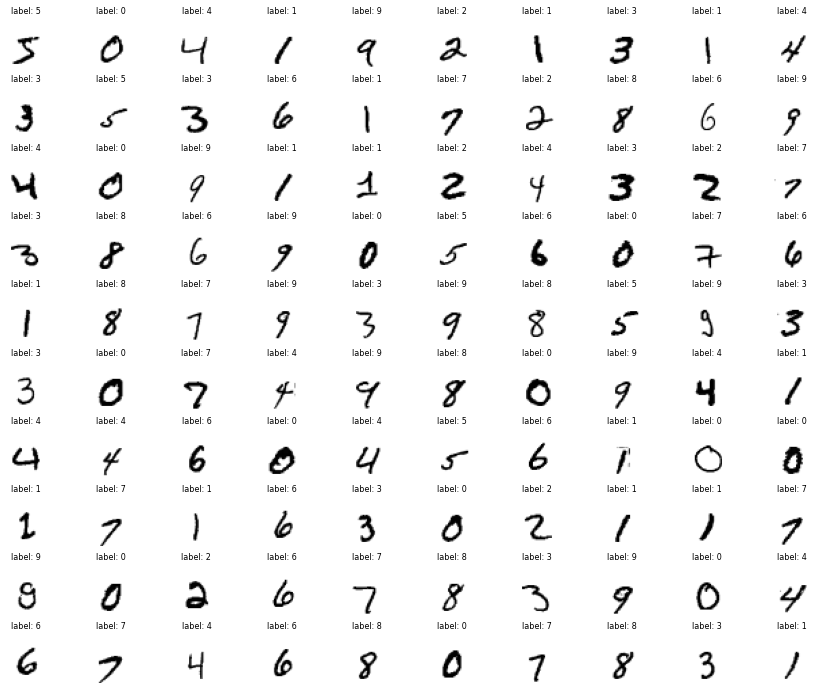

In [6]:
# Visualize digit images
fig = plt.subplots(figsize=(15,12))
plt.subplots_adjust( hspace=0.8 )
a = 10  # number of rows
b = 10  # number of columns

for character in range(0,a*b):
    some_digit = np.array( X.iloc[character] )
    plt.subplot( a,b,character + 1 )
    some_digit_image = some_digit.reshape( 28, 28 )
    plt.imshow( some_digit_image, cmap = "binary" )
    plt.title('label: %i\n' % y.iloc[character], fontsize = 8)
    plt.axis( 'off' )

In [7]:
# functionalize this plot for future use
def plot_digits( images, index_list, images_mat_dim=10):
    a = images_mat_dim  # number of rows
    b = images_mat_dim  # number of columns

    for idx, im_idx in enumerate( index_list ):
        some_digit = np.array( images.iloc[im_idx] )
        plt.subplot( a,b,idx + 1 )
        some_digit_image = some_digit.reshape( 28, 28 )
        plt.imshow( some_digit_image, cmap = "binary" )
        plt.axis( 'off' )
    plt.show()

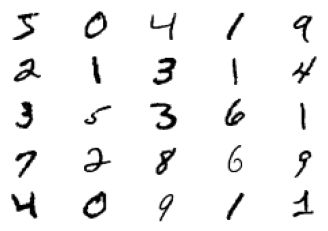

In [8]:
mat_size = 5
plot_digits( X, list( range( 0, mat_size*mat_size ) ), mat_size)

### Train/Test splits

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

We'll work with the training set to train our model.  
Once we develop our model, we can evaluate with the test dataset.

## Binary Classification

Predicting a classification where only two outcomes are possible. 

### Logistic Regression

Uses a logistic function to model a binary target variable

### Remembering the Logistic Function

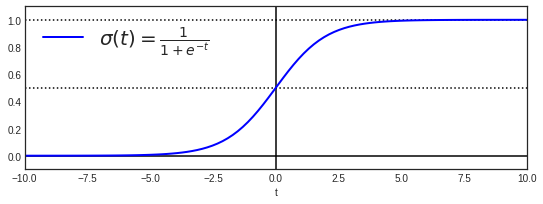

In [10]:
plt.style.use('seaborn-white')
t = np.linspace(- 10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:") 
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t") 
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

* Logistic Function: $$\sigma(t) = \frac{e^t}{e^t+1} = \frac{1}{1 + e^{-t}}$$

* We assume a Linear relationship for our classification problem:  $$t = \beta_0 + \beta_1x + \cdots$$

* We can rewrite our Logistic Regression Function as: $$\sigma(t) = \frac{e^t}{e^t+1} = \frac{1}{1 + e^{-(\beta_0 + \beta_1x + \cdots)}}$$

* fit to our data (e.g. Gradient Descent methods) such that we minimize a cost function.

[a casual explanation](https://towardsdatascience.com/whats-linear-about-logistic-regression-7c879eb806ad)

### Rephase MNIST for Binary Logistic Regression

Let's build a binary logistic classifier to determine if a given digit is itself or not.  
[`scikit-learn` docs](https://scikit-learn.org/stable/modules/linear_model.html)

In [11]:
exp = 5
y_train_exp = (y_train == exp) # True where y==exp ; False everywhere else
y_test_exp = (y_test == exp) # "..."

In [12]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression class object
log_reg = LogisticRegression(penalty='l1', solver='saga', tol=0.1) # lbfgs is a faster solver

In [13]:
# fit to the data
log_reg.fit(X_train, y_train_exp)

LogisticRegression(penalty='l1', solver='saga', tol=0.1)

### `LogisticRegression()` predictions

evaluate the model's fit to the training data 

In [14]:
print( log_reg.predict(X_train[0:10]) )
print( y_train_exp.iloc[0:10].values )

[ True False False False False False  True False False False]
[ True False False False False False  True False False False]


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X_train, y_train_exp, cv=5, scoring="accuracy")

array([0.97401786, 0.97553571, 0.9725    , 0.97232143, 0.97178571])

### `cross_val_score`

`cross_val_score` - evaluate a score by cross-validation

* **scoring** - [model selection and evaluation tools](https://scikit-learn.org/stable/modules/model_evaluation.html)
* **cross-validation** - a resampling method. a portion of the training data is held out from model training and used to estimate model accuracy during model development.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="60%" style="margin-left:auto; margin-right:auto">

### Evaluating a Classifier

Questions: What would chance performance be here?

**Dummy Classifier** - a type of classifier that does not generate any insight about the data and classifies by a simple rule without trying to find a pattern in the data. For example, classify everything as the most common class.

What **accuracy** do you expect from a classifier that classifies everything as `False`?

### Confusion Matrix

`cross_val_predict` - generate a set of predictions. the cross-validation means that for each 'fold', the model was fit on the remainder of the data and returns a set of predictions on the unseen fold.  

**confusion matrix**  

|                  |   **Predicted True**  |    **Predicted False**   |
|:----------------:|:---------------------:|:------------------------:|
|  **Actual True** | true positives (TP)  | false negatives (FN)  |
| **Actual False** |    false positives (FP)    |      true negatives (TN)     |

What would the confusion matrix for a perfect classifier look like?

#### Confusion matrix for our model...

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(log_reg, X_train, y_train_exp, cv=5)
confusion_matrix(y_train_exp, y_train_pred)

array([[50529,   431],
       [ 1081,  3959]])

### Precision & Recall

* **precision** - what proportion of actual positives get correctly labeled as such? $\frac{TP}{TP+FP}$

* **sensitivity** (recall) - what proportion of predicted positives are actual positives? $\frac{TP}{TP+FN}$

* **$F_1 \mbox{score}$** we can combine these precision and recall as a metric to evaluate our model. a harmonic mean: will only get a high score if both precision and recall are high. $\frac{\mbox{precision}*\mbox{recall}}{\mbox{precision}+\mbox{recall}}$

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

print( 'precision: ', precision_score(y_train_exp, y_train_pred) )
print( 'recall: ', recall_score(y_train_exp, y_train_pred) )
print( 'f1_score: ', f1_score( y_train_exp, y_train_pred))

precision:  0.9018223234624145
recall:  0.785515873015873
f1_score:  0.83966065747614


### Where is the Model Getting Confused?

Let's visualize some of the mislabeled digits

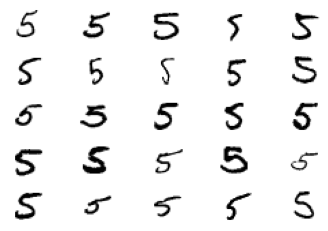

In [39]:
cl_T, cl_F = True, False
X_TT = X_train[(y_train_exp == cl_T) & (y_train_pred == cl_T)]
X_TF = X_train[(y_train_exp == cl_T) & (y_train_pred == cl_F)]
X_FT = X_train[(y_train_exp == cl_F) & (y_train_pred == cl_T)]
X_FF = X_train[(y_train_exp == cl_F) & (y_train_pred == cl_F)]
mat_size = 5

plot_digits( X_TT, list( range( 0, mat_size*mat_size ) ), mat_size) 
#plot_digits( X_TF, list( range( 0, mat_size*mat_size ) ), mat_size)  
#plot_digits( X_FT, list( range( 0, mat_size*mat_size ) ), mat_size)  
#plot_digits( X_FF, list( range( 0, mat_size*mat_size ) ), mat_size)  

We could visually evaluate model performance by plotting $$\mbox{precision} \sim \mbox{recall}$$  

However, it is more common to evaluate $$\mbox{true positive rate} \sim \mbox{false positive rate} == \mbox{recall} \sim 1-\mbox{sensitivity}$$
...in other words, the **ROC curve**

In [40]:
from sklearn.metrics import roc_curve


y_scores = cross_val_predict(log_reg, X_train, y_train_exp, cv=5,
                             method="decision_function")
log_reg_fpr, log_reg_tpr, thresholds = roc_curve( y_train_exp, y_scores )

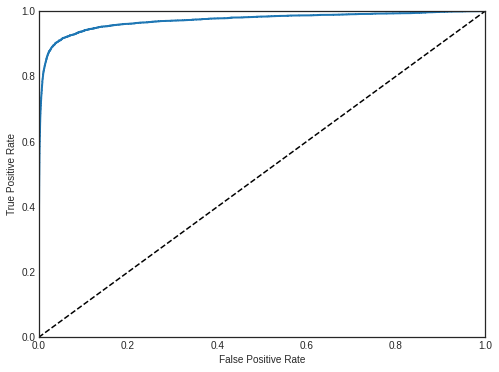

In [41]:
# visualize the ROC
plt.figure(figsize=(8, 6))
plt.plot( log_reg_fpr, log_reg_tpr, linewidth = 2 )
plt.plot( [0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])                                  
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')   

plt.show()

### Area Under the Curve

**Comparing Models** - the Area Under the Curve (AUC) is often used as a measure to compare classifier performance. A perfect classifier will have and AUC = 1.  

What would be the AUC of a model performing at chance?

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_exp, y_scores)

0.9716750766240563

### Support Vector Machines 

* a simple algorithm that finds a **decision boundary** to separate target classes
* decision boundary: classification will be assigned depending on what side of the boundary an observation appears
* goal: maximize the distance between the nearest instances for each class

Let's see SVM in action with [this demo](https://jgreitemann.github.io/svm-demo)

In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='linear'))]
pipeline = Pipeline(steps)

parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]}

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform( X_train )
X_test_scaled = scaler.fit_transform( X_test )

svm_clf = SVC( kernel='linear' )
svm_clf.fit( X_train_scaled, y_train )
# but this will take a long time

SVC(kernel='linear')

In [53]:
#import pickle
#filename = 'svm_clf'
#pickle.dump(svm_clf, open(filename, 'wb'))

# load the model from disk
svm_clf = pickle.load(open(filename, 'rb'))
svm_clf

SVC(kernel='linear')

In [48]:
y_train_pred = cross_val_predict(svm_clf, X_train, y_train_exp, cv=5)
confusion_matrix(y_train_exp, y_train_pred)

array([[50527,   433],
       [ 1078,  3962]])

### SVM has hyperparameters

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYG48xX8xCzQZ-EdDa_gfFjGGVY3onfwIB_A&usqp=CAU" width="60%" style="margin-left:auto; margin-right:auto">

### Training SVM

* **C**
* **gamma**

There are also different the kernels

In [16]:
#grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)
#grid.fit(X_train, y_train)

https://medium.com/analytics-vidhya/hyperparameter-tuning-an-svm-a-demonstration-using-hyperparameter-tuning-cross-validation-on-96b05db54e5b

https://towardsdatascience.com/svm-hyperparameters-explained-with-visualizations-143e48cb701b

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/



## Python & Pandas 4 Penguins

Let's use an example dataset to learn about multinomial logistic regression.  
We will be using the [Palmer Penguins](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081) [dataset](https://github.com/allisonhorst/palmerpenguins). It's a newer alternative to the [classic Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [ ]:
penguins = pd.read_csv("https://raw.githubusercontent.com/SmilodonCub/DS4VS/master/datasets/penguins.csv")

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

## Up next: Trees
<img src="https://content.techgig.com/photo/80071467/pros-and-cons-of-python-programming-language-that-every-learner-must-know.jpg?132269" width="100%" style="margin-left:auto; margin-right:auto">